<a href="https://colab.research.google.com/github/Sajeethaprabu/CHAT-ROOM/blob/main/ITECH_DIZZYNESS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Processing video...


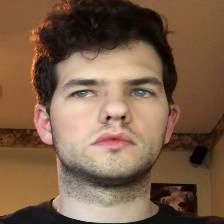

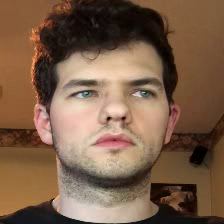

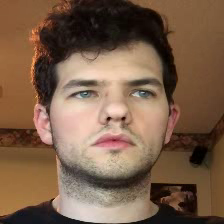

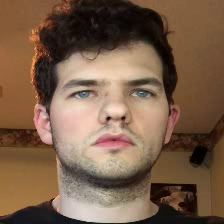

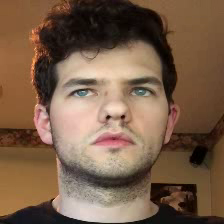

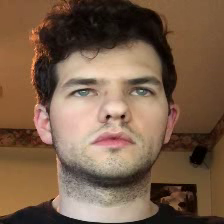

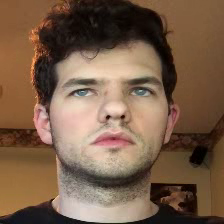

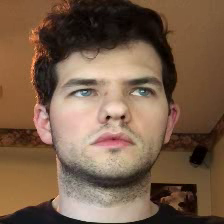

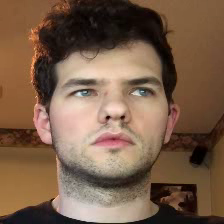

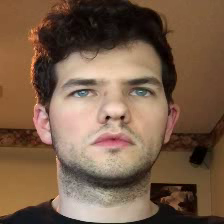

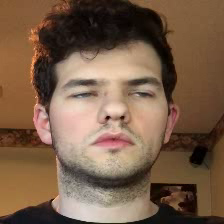

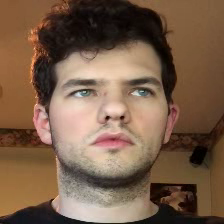

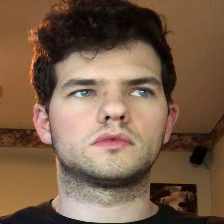

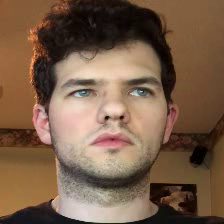

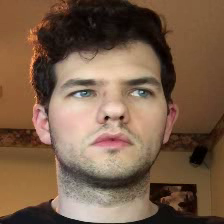

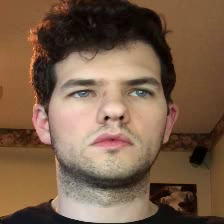

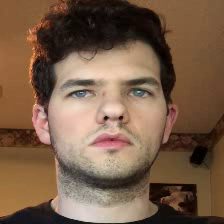

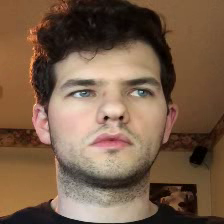

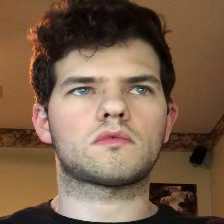

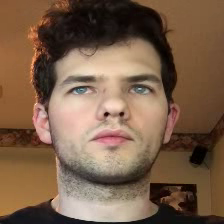

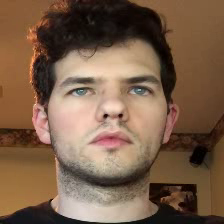

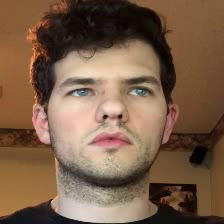

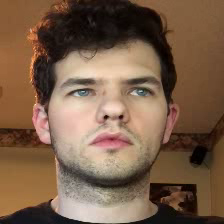

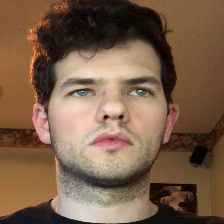

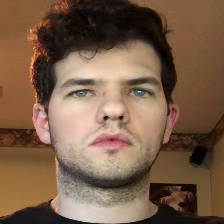

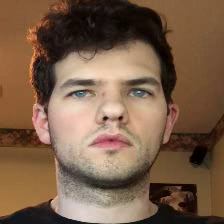

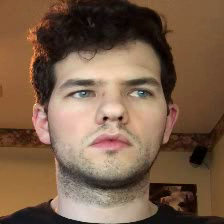

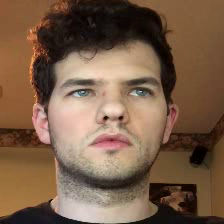

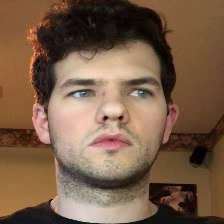

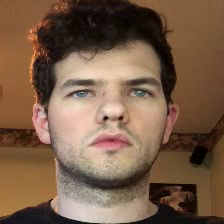

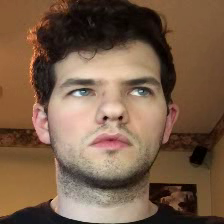

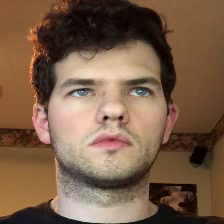

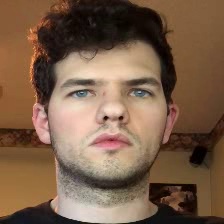

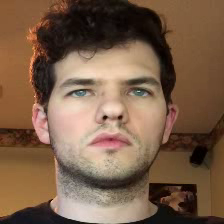

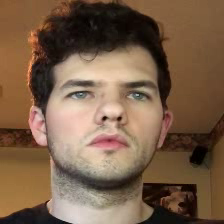

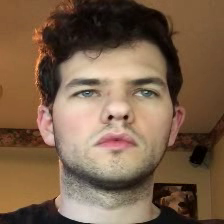

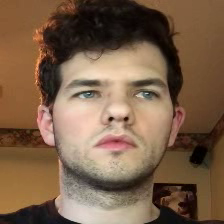

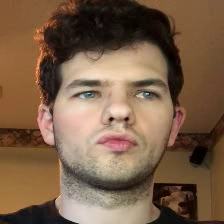

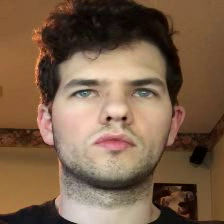

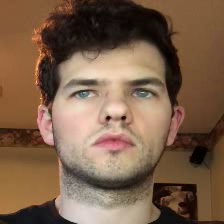

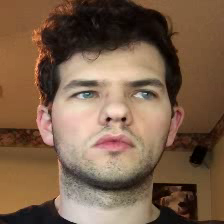

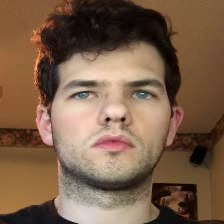

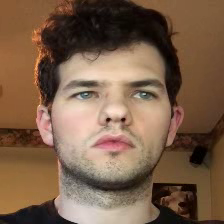

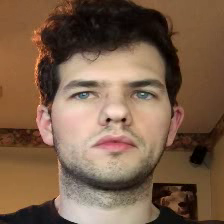

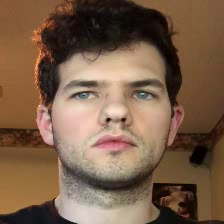

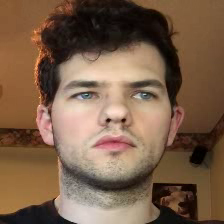

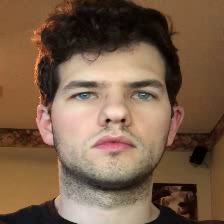

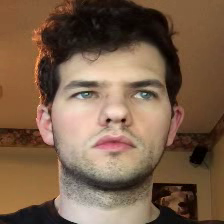

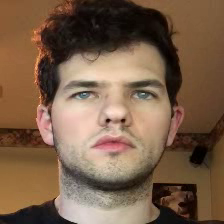

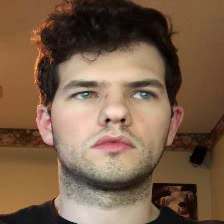

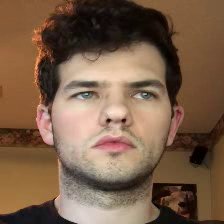

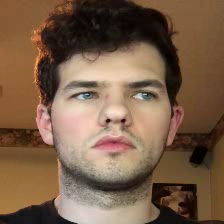

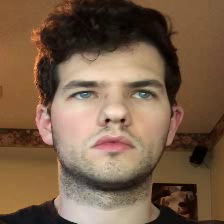

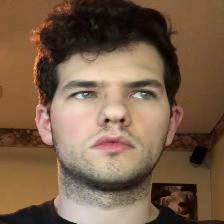

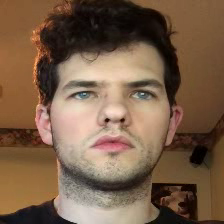

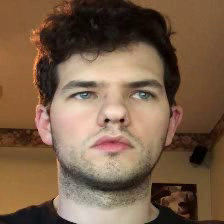

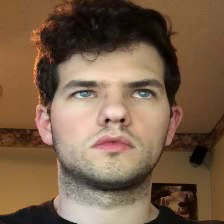

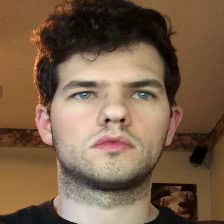

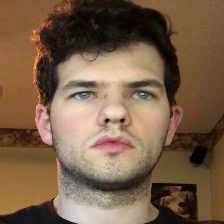

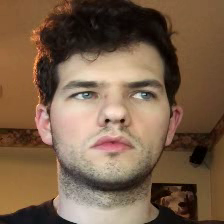

Final Prediction: ALERT


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

#Loading all the requirements of the drowsyness prediction

VIDEO_PATH = "/content/02_10_1.mp4"   #Uplaoding the path of the video
CLOSED_THRESHOLD = 15 #If eyes are not detected for 15 consecutive frames .We consider person as DROWSY
MIN_BLINK_FRAMES = 3 #If eyes are closed for at least 3 frames .Count it as a blink


# Face detection model (built-in OpenCV model)
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
)
# Eye detection model (built-in OpenCV model)
eye_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_eye.xml'
)

cap = cv2.VideoCapture(VIDEO_PATH) # Open the video file

closed_counter = 0# Counter for consecutive frames where eyes are not detected
blink_count = 0 # Counter for total number of blinks
frame_number = 0
final_status = "ALERT"# Final status of the person (ALERT / DROWSY)

print("Processing video...")

while True:
    ret, frame = cap.read()# Read one frame from video
    if not ret: # If video ends, exit loop
        break

    frame_number += 1 # Increase frame counter

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) #Convert frame to grayscale (Haar works better on grayscale)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5) # Detect faces in the frame

    eyes_detected = False # Assume eyes are not detected initially

    for (x, y, w, h) in faces: # Loop through detected face
        face_gray = gray[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(face_gray)

        if len(eyes) >= 2:        # If two or more eyes detected → person is alert
            eyes_detected = True
   # Blink Detection Logic
    if eyes_detected:
        if closed_counter >= MIN_BLINK_FRAMES:
            blink_count += 1
        closed_counter = 0
    else:
        closed_counter += 1
 # If eyes remain closed for too long → DROWSY
    if closed_counter >= CLOSED_THRESHOLD:
        final_status = "DROWSY"
    else:
        final_status = "ALERT"
 # (Showing every frame will freeze notebook)

    if frame_number % 10 == 0:
        cv2_imshow(frame)
# Release video memory
cap.release()

# Final Output
print("Final Prediction:", final_status)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>